In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from os import listdir
%matplotlib inline
from PIL import Image
from imageio import imread
import os 
sns.set()
from skimage.color import rgb2gray
import scipy
import skimage
from skimage import io, color
from scipy import ndimage 
import cv2
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
Directory='train'
subfolders = listdir(Directory)

In [4]:
len(subfolders)

38

In [5]:
total_images = 0
for folder in subfolders:
    total_images += len(listdir(Directory+ "/" + folder))
total_images

70295

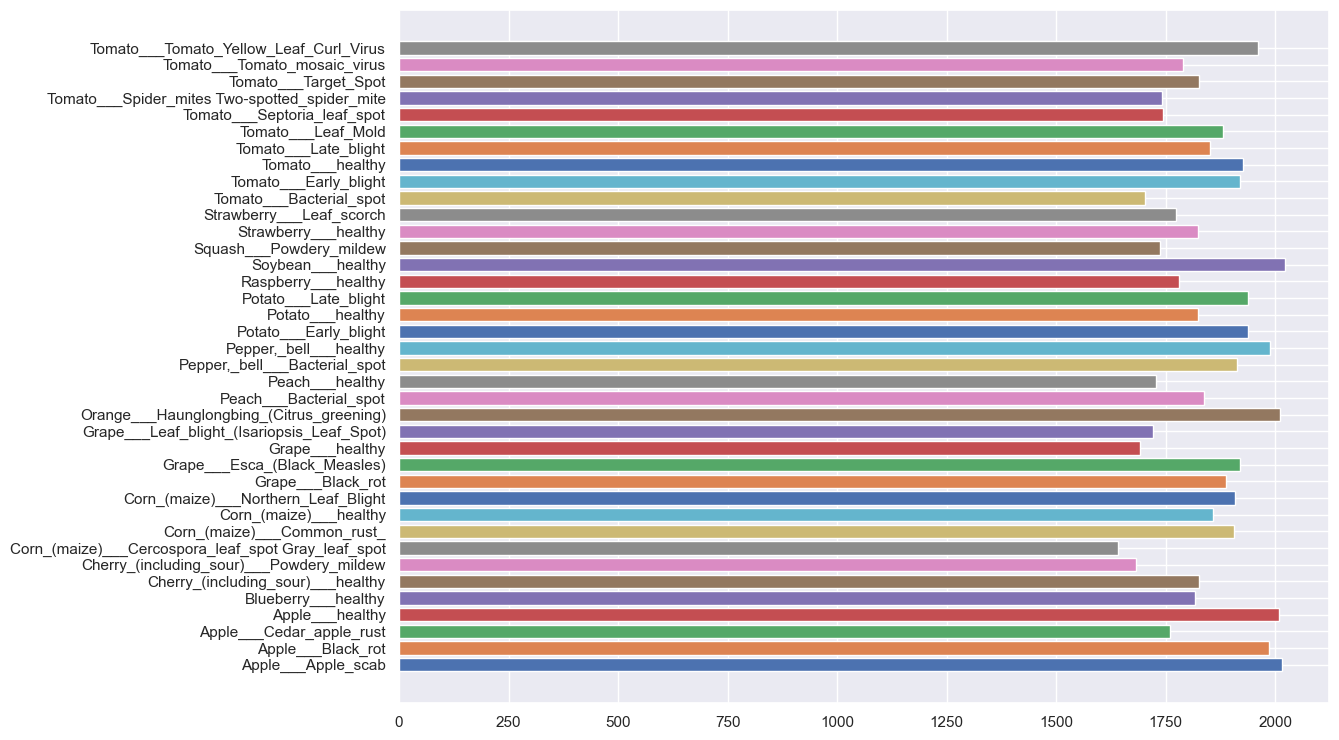

In [6]:
plt.figure(figsize=(12,9))

total_images =0
for folder in subfolders:
    total_images= len(listdir(Directory +"/" + folder))
    plt.barh(y=folder,width=total_images)

In [7]:
len(subfolders)

38

In [8]:
# ici on fait quelques affichage,pour savoir à quoi correspond nos images que l'on souhaite étudier
# Vous pouvez choisir vous même le nombre de bloc et les catégories des classes à afficher 

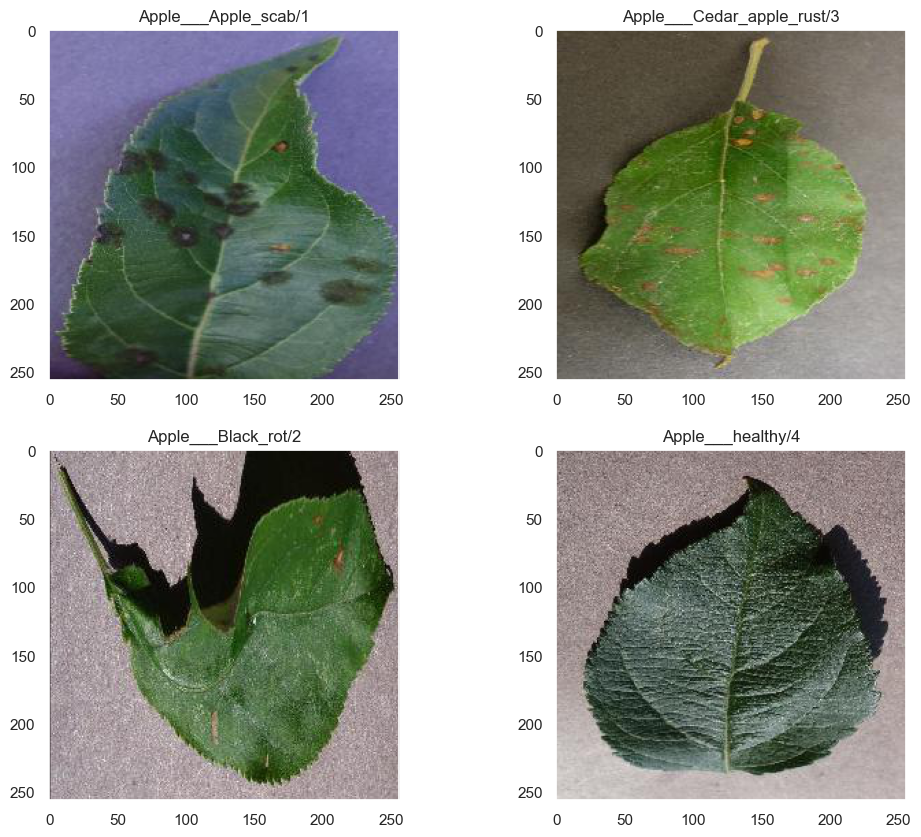

In [9]:
fig, ax = plt.subplots(2,2,figsize=(12,10))
for m in range(2):
    for n in range(2):
        folder = subfolders[m+n*2]
        files = listdir(Directory + "/" + folder)
        image =np.array(Image.open(Directory + "/" + folder + "/" + files[1]))
        
        ax[m,n].imshow(image)
        ax[m,n].grid(False)
        ax[m,n].set_title(folder + "/" + str(m+n*2+1))

In [10]:
# On observe bien sur les images que seuls les plantes dont les feuilles contiennent des artefacts sont malade
# les classes des plantes suivie de "healthy" sont des plantes en bonne santé c'est à dire "non malade"

In [11]:
# En plus de la visualisation des nos differentes images on aimerai davantage les connaitre un peu plus..
# C'est pour cela on affiche l'histogramme des images ci-dessus
# Dabort il faut tout de même savoir qu'une image est une matrisse compose des milliers des pixels suivant sa hauteur,sa largeur
# et la dimension de sa couleur.
# Dans une image les pixels peuvent prendre jusqu'à 255 valeurs, en tout cas dans une image à 8 bits=2^8=256 (0,225)
# Ici l'affichage se fait comme suite:les nombres de pixels suivant chacune de ces couleurs(appeler aussi classe)

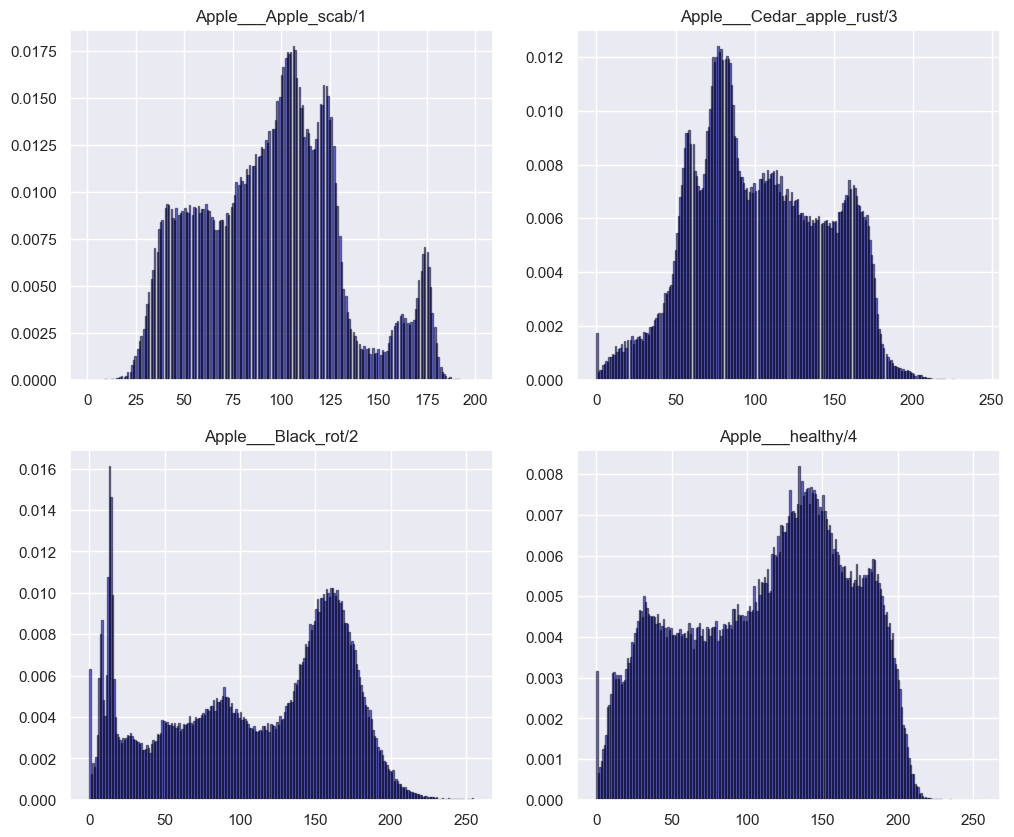

In [12]:
fig, ax = plt.subplots(2,2,figsize=(12,10))

for m in range(2):
    for n in range(2):
        folder = subfolders[m+n*2]
        files = listdir(Directory + "/" + folder)
        image =np.array(Image.open(Directory + "/" + folder + "/" + files[1]))
        
        image1=image[:,:,0]
        ax[m,n].hist(image.ravel(),bins=255,density=True , alpha=.5 , edgecolor='black', color='blue')
        #ax[m,n].grid(False)
        ax[m,n].set_title(folder + "/" + str(m+n*2+1))

In [13]:
# Le filtrage constitue un volet très important en traitement d'images (il permet d'appliquer divers effets sur les images).
# Nous alllons générer des filtres en utilisant le module ndimage, créer des images filtrées et comparer les histogrammes 
# des pixels des deux images (originale et filtrée).

In [14]:
# Ici on passe en une autre dimension d'étude celles des gaussien
# On étudie les filtres suivant la modèl gaussien
# on varie le sigma pour observer le changement et sur l'image et l'histogramme
# Il ya aussi plusieurs façon de filtre comme mimimun ,maximun 

In [15]:
folder = subfolders[1]
files = listdir(Directory + "/" + folder)
image =np.array(Image.open(Directory + "/" + folder + "/" + files[1]))

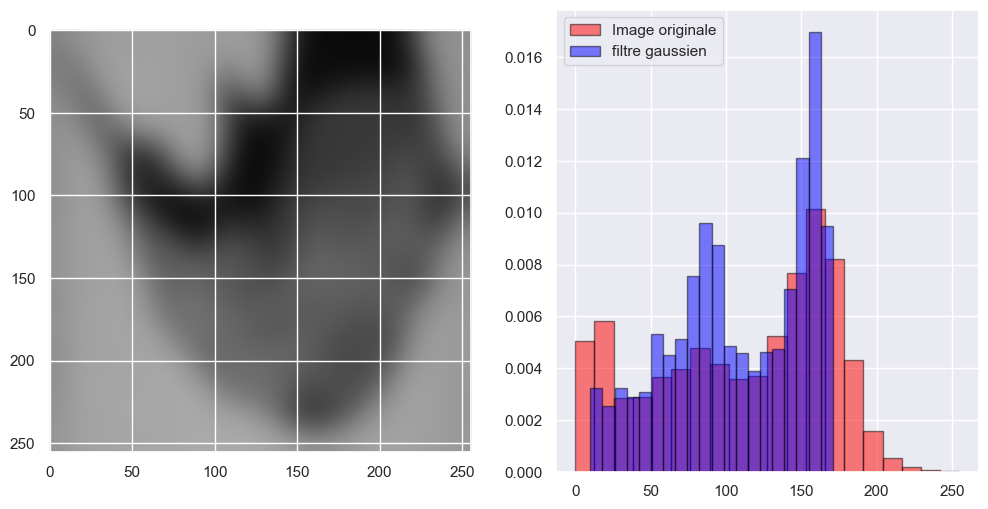

In [16]:
fig, (ax1, ax2)= plt.subplots(1,2,figsize=(12,6))

### filtre gaussian
gaussian_image = ndimage.gaussian_filter( image , sigma =10 )
ax1.imshow( gaussian_image );
### histogramme des pixels

# image originale
ax2.hist(image.flatten(), bins=20, density=True , alpha=.5 , edgecolor='black', color='red' , label='Image originale');


# image filtrée
ax2.hist(gaussian_image.flatten(),bins=20, density=True ,alpha=.5 ,edgecolor='black', color='blue', label='filtre gaussien');
ax2.legend();

In [17]:
# on choisit la classe et l'élement qu'uon souhaite affiche de la classe
# on affiche en background  gris

In [18]:
folder = subfolders[1]
files = listdir(Directory + "/" + folder)
image =np.array(Image.open(Directory + "/" + folder + "/" + files[3]))

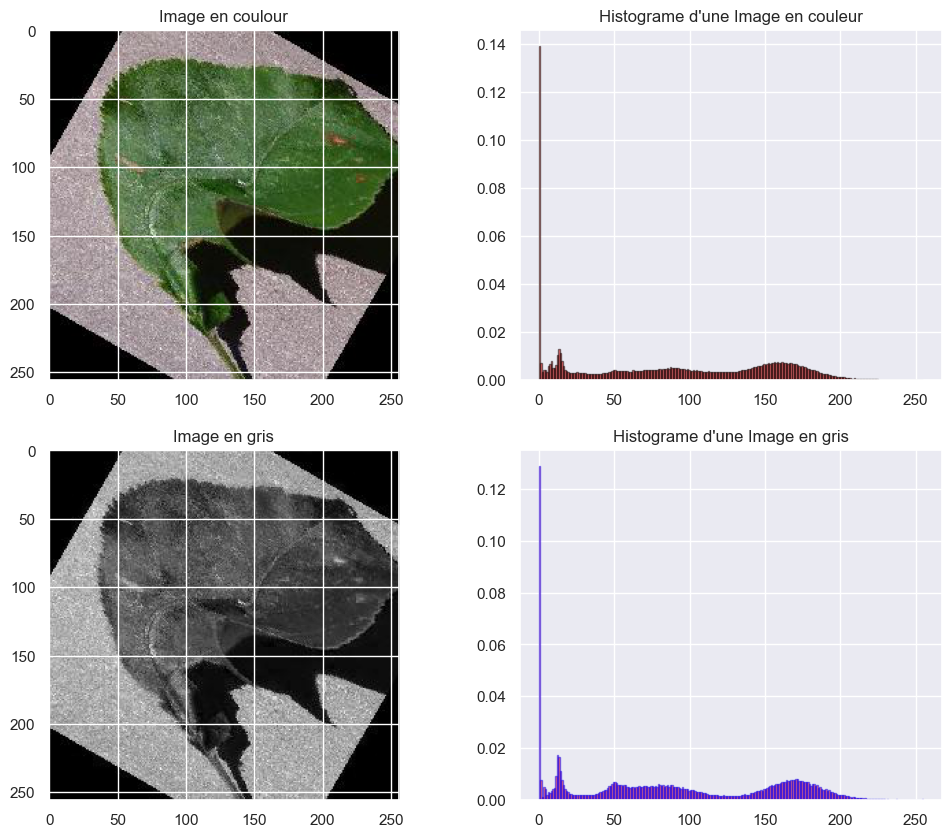

In [19]:
fig, ax = plt.subplots(2,2,figsize=(12,10))

plt.subplot(221)

plt.imshow(image);
plt.title("Image en coulour")
plt.subplot(222)

plt.hist(image.ravel(),bins=255, density=True , alpha=.5 , edgecolor='black', color='red' );
plt.title("Histograme d'une Image en couleur")

plt.subplot(223)


image1=image[:,:,0]
plt.imshow(image1,cmap='gray');
plt.title("Image en gris")

plt.subplot(224)

plt.hist(image1.ravel(),bins=255, density=True , alpha=.5 , edgecolor='blue', color='red' );
plt.title("Histograme d'une Image en gris")

plt.show()

In [20]:
# on remarque 3 regroupements de couleur d'image avec des frequence differentes que l'on observe sur les deux images.
# on observe une hausse de frequence du premier regroupement de 0.016 de l'image en couleur à près de 0.025 en gris

In [21]:
#Ici nous allons générer des images bruitées à partir de notre image de test(choisir au hazard) en nuance de gris

In [22]:
folder = subfolders[1]
files = listdir(Directory + "/" + folder)
image =Image.open(Directory + "/" + folder + "/" + files[1])

In [23]:
#image_grise= rgb2grey(image)

In [24]:
image = io.imread(Directory + "/" + folder + "/" + files[1])
image_grise =rgb2gray(image)

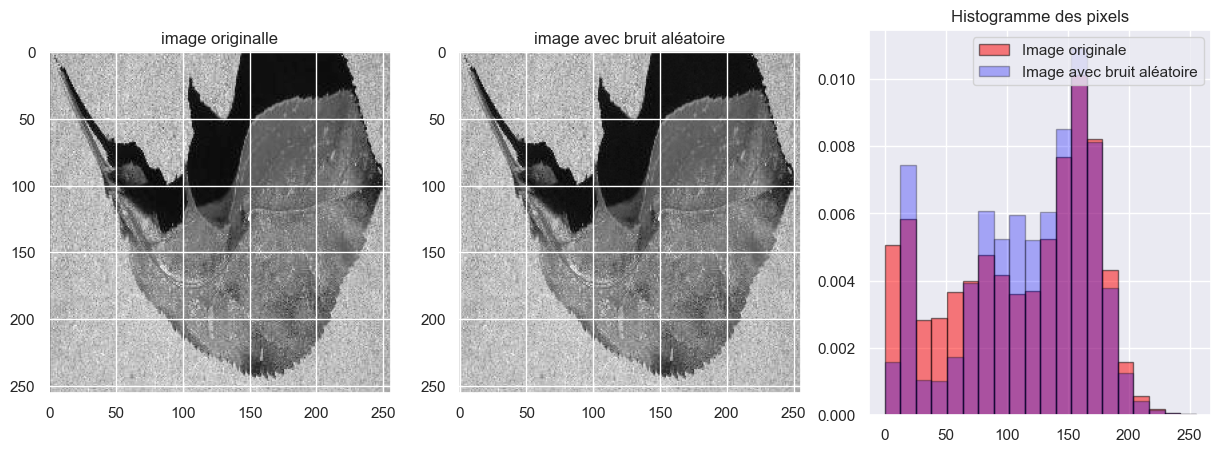

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
w=0.1 # le poids de nuance qu'on souhaite
# image en nuance de gris
axs[0].imshow(image_grise, cmap = 'Greys_r')
axs[0].set_title( 'image originalle' )
# image avec bruit aléatoire
bruit_image = image_grise + w* image_grise.std() * np.random.random(image_grise.shape)
bruit_image = np.uint8( ( bruit_image / bruit_image.max() ) * 255 )
axs[1].imshow( bruit_image, cmap = 'Greys_r')
axs[1].set_title( 'image avec bruit aléatoire' )
# histogramme des pixels
axs[2].hist(np.array(image).flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red' , label = 'Image originale')
axs[2].hist(np.array(bruit_image).flatten(), bins = 20, density = True , alpha = .3 , edgecolor = 'black', color = 'blue', label = 'Image avec bruit aléatoire')
axs[2].legend();
axs[2].set_title( 'Histogramme des pixels' );

In [26]:
# ici on va appliquer le filtre gaussien à une image bruitée pour voir l'effect

Text(0.5, 1.0, 'filtre gaussien')

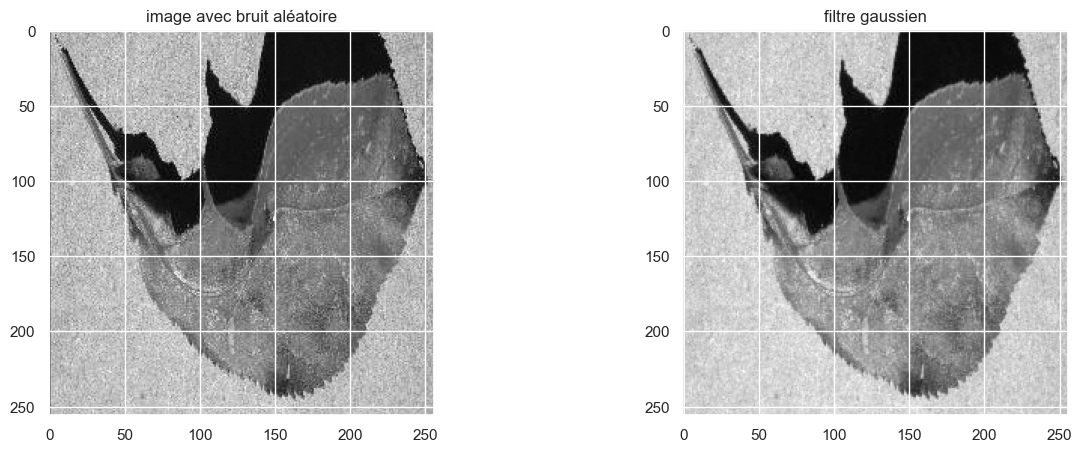

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# image avec bruit aléatoire
axs[0].imshow(bruit_image, cmap = 'Greys_r')
axs[0].set_title( 'image avec bruit aléatoire' )
# image bruitée avec filtre gaussien
gaussien_image = ndimage.gaussian_filter(bruit_image ,sigma = 0.5)
axs[1].imshow( gaussien_image, cmap = 'Greys_r')
axs[1].set_title( 'filtre gaussien' )

In [28]:
# on remarque bien qu’il y a une amélioration

In [29]:
# ici on essaie de detecter les bords de notre plante

In [30]:
folder = subfolders[0]
files = listdir(Directory + "/" + folder)
image =Image.open(Directory + "/" + folder + "/" + files[1])

In [31]:
image = io.imread(Directory + "/" + folder + "/" + files[1])
image_grise =rgb2gray(image)

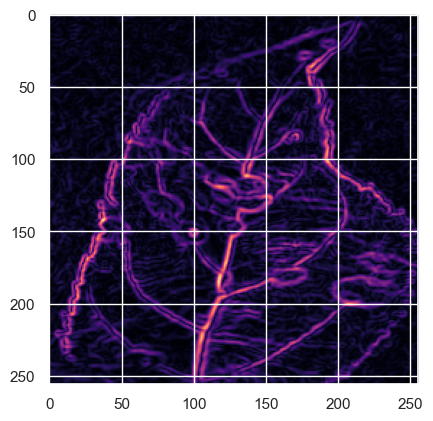

In [32]:
# filtre gaussien pour réduir le bruit
image_grise_gaussian = ndimage.gaussian_filter( image_grise*255 , sigma=1)
# détecteur de bords sobel
edges_image = image_grise_gaussian.astype('int32')
dx = ndimage.sobel(edges_image, 0) 
dy = ndimage.sobel(edges_image, 1) 
edges_image = np.hypot(dx, dy)
# affichage 
plt.imshow(edges_image, cmap = 'magma')
plt.show()

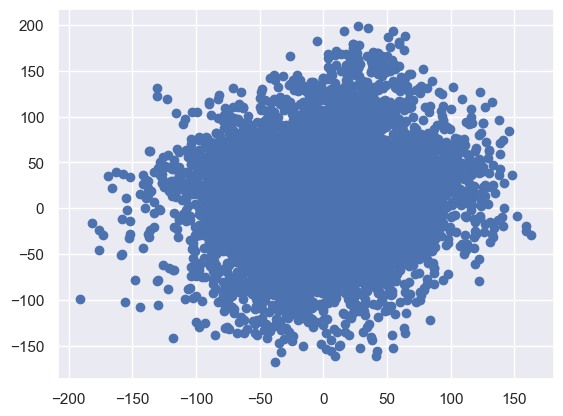

In [33]:
plt.scatter(dx, dy);

In [35]:
# on observe que les bords sont parfaitement dessiner en plus de l'éffet de la plante
# Par la suite on pourra faire une étude de comparaission de deux plantes dans des images differentes pour savoir sa classe..>>

In [36]:
total_images = 0
for folder in subfolders:
    total_images += len(listdir(Directory+ "/" + folder))
total_images

70295

In [37]:
# Ici on cree le dataset final comportant pour chaque image les informations de l'espèce de la présence de maladie ou non 
# et de la maladie

In [38]:
plantstate = pd.DataFrame(index=np.arange(0, total_images), columns=["Largeur", "Hauteur","Nb_pixels", "Espèces"])

In [39]:
k = 0
all_images = []
for m in tqdm(range(len(subfolders))):
    folder = subfolders[m]
    
    images = listdir(Directory + "/" + folder)
    all_images.extend(images)
    n_images = len(images)
    for n in range(0, n_images):
        files = listdir(Directory + "/" + folder)
        image =np.array(Image.open(Directory + "/" + folder + "/" + files[n]))

        plantstate.loc[k, "Largeur"] =image.shape[0]
        plantstate.loc[k, "Hauteur"] = image.shape[1]
        plantstate.loc[k, "Nb_pixels"] =image.shape[0]*image.shape[1]*image.shape[2]
        plantstate.loc[k, "Espèces"] = folder
        plantstate.loc[k, "Nom_image"] = images[n]
        k+=1

  0%|          | 0/38 [00:00<?, ?it/s]

In [149]:
plantstate[['Nom de plante', 'Type de maladie']] = plantstate.Espèces.str.split("___", expand = True)

In [150]:
plantstate['Malade'] = plantstate['Type de maladie'].apply(lambda x: 0 if x=="healthy"  else  1 )

In [151]:
plantstate.Malade.value_counts()/len(plantstate)

1    0.682851
0    0.317149
Name: Malade, dtype: float64

In [152]:
# On constante que plus de 2/3 des données appartiennent à la classe “1” c'est à dire des plantes non malade contre seulement 
# 1/3 à la classe “0” c'est à dire des plantes malade est un dataset déséquilibré.
# En machime à learning ce type de problème est assez pertinent surtout dans les modèles supervisés

In [153]:
#np.savetxt('plante1.csv', plantstate,fmt='%s', delimiter=",", header="Largeur,Hauteur,Nb_pixels,Espèces,Nom_image,Nom de plante,Type de maladie,Malade")

In [154]:
plantstate.head()

,Largeur,Hauteur,Nb_pixels,Espèces,Nom_image,Nom de plante,Type de maladie,Malade
0,256,256,196608,Apple___Apple_scab,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,Apple,Apple_scab,1
1,256,256,196608,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,Apple_scab,1
2,256,256,196608,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,Apple_scab,1
3,256,256,196608,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,Apple_scab,1
4,256,256,196608,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,Apple_scab,1


In [155]:
plantstate.to_csv("data.csv")

In [156]:
f=pd.read_csv("data.csv",index_col=0)

In [157]:
f.head()

,Largeur,Hauteur,Nb_pixels,Espèces,Nom_image,Nom de plante,Type de maladie,Malade
0,256,256,196608,Apple___Apple_scab,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,Apple,Apple_scab,1
1,256,256,196608,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,Apple_scab,1
2,256,256,196608,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,Apple_scab,1
3,256,256,196608,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,Apple_scab,1
4,256,256,196608,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,Apple_scab,1


In [158]:
plan= pd.DataFrame(index=np.arange(0, len(subfolders)), columns=["Espèces","Proba_apparition_classe"])

In [159]:
for m in range(len(subfolders)):
    folder = subfolders[m]
        
    plan.loc[m, "Espèces"] = folder

    plan.loc[m, "Proba_apparition_classe"] = "{:.2%}".format(plantstate[plantstate["Espèces"]==folder].count()[0]/total_images)

In [160]:
plan.head()

,Espèces,Proba_apparition_classe
0,Apple___Apple_scab,2.87%
1,Apple___Black_rot,2.83%
2,Apple___Cedar_apple_rust,2.50%
3,Apple___healthy,2.86%
4,Blueberry___healthy,2.58%


In [161]:
plan.Proba_apparition_classe.unique()
# on sent un équilibre entre les classes de probabilité c'est à dire qu'un élément soit dans chaqu'une des classes
# min=2.34% et max=2.87%

array(['2.87%', '2.83%', '2.50%', '2.86%', '2.58%', '2.60%', '2.39%',
       '2.34%', '2.71%', '2.64%', '2.69%', '2.73%', '2.41%', '2.45%',
       '2.61%', '2.46%', '2.72%', '2.76%', '2.59%', '2.53%', '2.88%',
       '2.47%', '2.52%', '2.42%', '2.74%', '2.63%', '2.68%', '2.48%',
       '2.55%', '2.79%'], dtype=object)

In [162]:
table=plantstate.groupby(["Nom de plante","Type de maladie","Malade"]).agg({"Malade":"count"})

In [163]:
table.rename(columns={"Malade":"Nombre d'élements"})

Nombre d'élements
Nom de plante           Type de maladie                      Malade                   
Apple                   Apple_scab                           1                    2016
                        Black_rot                            1                    1987
                        Cedar_apple_rust                     1                    1760
                        healthy                              0                    2008
Blueberry               healthy                              0                    1816
Cherry_(including_sour) Powdery_mildew                       1                    1683
                        healthy                              0                    1826
Corn_(maize)            Cercospora_leaf_spot Gray_leaf_spot  1                    1642
                        Common_rust_                         1                    1907
                        Northern_Leaf_Blight                 1                    1908
                        healthy                              0                    1859
Grape                   Black_rot                            1                    1888
                        Esca_(Black_Measles)                 1                    1920
                        Leaf_blight_(Isariopsis_Leaf_Spot)   1                    1722
                        healthy                              0                    1692
Orange                  Haunglongbing_(Citrus_greening)      1                    2010
Peach                   Bacterial_spot                       1                    1838
                        healthy                              0                    1728
Pepper,_bell            Bacterial_spot                       1                    1913
                        healthy                              0                    1988
Potato                  Early_blight                         1                    1939
                        Late_blight                          1                    1939
                        healthy                              0                    1824
Raspberry               healthy                              0                    1781
Soybean                 healthy                              0                    2022
Squash                  Powdery_mildew                       1                    1736
Strawberry              Leaf_scorch                          1                    1774
                        healthy                              0                    1824
Tomato                  Bacterial_spot                       1                    1702
                        Early_blight                         1                    1920
                        Late_blight                          1                    1851
                        Leaf_Mold                            1                    1882
                        Septoria_leaf_spot                   1                    1745
                        Spider_mites Two-spotted_spider_mite 1                    1741
                        Target_Spot                          1                    1827
                        Tomato_Yellow_Leaf_Curl_Virus        1                    1961
                        Tomato_mosaic_virus                  1                    1790
                        healthy                              0                    1926

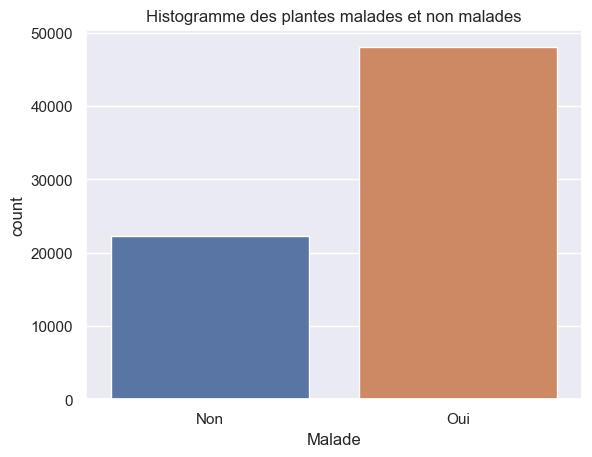

In [164]:
plt.title("Histogramme des plantes malades et non malades");
ax =sns.countplot(plantstate['Malade']);
ax.set(xticklabels = (['Non', 'Oui']));

In [165]:
pd.Series(plantstate['Nom de plante'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Tomato                     26.1%
Apple                      11.1%
Corn_(maize)               10.4%
Grape                      10.3%
Potato                      8.1%
Pepper,_bell                5.5%
Strawberry                  5.1%
Peach                       5.1%
Cherry_(including_sour)     5.0%
Soybean                     2.9%
Orange                      2.9%
Blueberry                   2.6%
Raspberry                   2.5%
Squash                      2.5%
Name: Nom de plante, dtype: object

In [166]:
# encore un autre problème surgit ,on retrouve le même déequilibré dans les differentes catégories

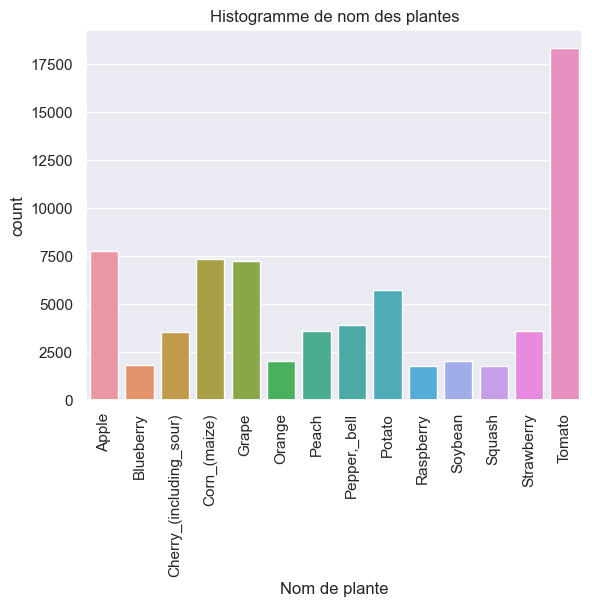

In [167]:
plt.title("Histogramme de nom des plantes");
ax =sns.countplot(plantstate['Nom de plante']);
plt.xticks(rotation="vertical");

In [168]:
df=plantstate.copy()

In [169]:
df.index=plantstate.Espèces

In [170]:
df=plantstate.drop(["Espèces",'Nom_image','Largeur','Hauteur','Nb_pixels'],axis=1)

In [171]:
df.index=plantstate.Espèces

In [172]:
df.head()

,Nom de plante,Type de maladie,Malade
Espèces,,,
Apple___Apple_scab,Apple,Apple_scab,1
Apple___Apple_scab,Apple,Apple_scab,1
Apple___Apple_scab,Apple,Apple_scab,1
Apple___Apple_scab,Apple,Apple_scab,1
Apple___Apple_scab,Apple,Apple_scab,1


In [173]:
ls=list(df.index)

In [174]:
ls;

In [175]:
df1= pd.get_dummies(df[["Nom de plante","Type de maladie"]])

In [176]:
df1.info();

<class 'pandas.core.frame.DataFrame'>
Index: 70295 entries, Apple___Apple_scab to Tomato___Tomato_Yellow_Leaf_Curl_Virus
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Nom de plante_Apple                                   70295 non-null  uint8
 1   Nom de plante_Blueberry                               70295 non-null  uint8
 2   Nom de plante_Cherry_(including_sour)                 70295 non-null  uint8
 3   Nom de plante_Corn_(maize)                            70295 non-null  uint8
 4   Nom de plante_Grape                                   70295 non-null  uint8
 5   Nom de plante_Orange                                  70295 non-null  uint8
 6   Nom de plante_Peach                                   70295 non-null  uint8
 7   Nom de plante_Pepper,_bell                            70295 non-null  uint8
 8   Nom de plante_Potato           

In [177]:
result = pd.concat([df,df1], axis=1)

In [178]:
result

,Nom de plante,Type de maladie,Malade,Nom de plante_Apple,Nom de plante_Blueberry,Nom de plante_Cherry_(including_sour),Nom de plante_Corn_(maize),Nom de plante_Grape,Nom de plante_Orange,Nom de plante_Peach,...,Type de maladie_Leaf_blight_(Isariopsis_Leaf_Spot),Type de maladie_Leaf_scorch,Type de maladie_Northern_Leaf_Blight,Type de maladie_Powdery_mildew,Type de maladie_Septoria_leaf_spot,Type de maladie_Spider_mites Two-spotted_spider_mite,Type de maladie_Target_Spot,Type de maladie_Tomato_Yellow_Leaf_Curl_Virus,Type de maladie_Tomato_mosaic_virus,Type de maladie_healthy
Espèces,,,,,,,,,,,,,,,,,,,,,
Apple___Apple_scab,Apple,Apple_scab,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Apple_scab,Apple,Apple_scab,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Apple_scab,Apple,Apple_scab,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Apple_scab,Apple,Apple_scab,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Apple_scab,Apple,Apple_scab,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato,Tomato_Yellow_Leaf_Curl_Virus,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [179]:
result=result.drop(["Nom de plante","Type de maladie"],axis=1)

In [180]:
result.head()

,Malade,Nom de plante_Apple,Nom de plante_Blueberry,Nom de plante_Cherry_(including_sour),Nom de plante_Corn_(maize),Nom de plante_Grape,Nom de plante_Orange,Nom de plante_Peach,"Nom de plante_Pepper,_bell",Nom de plante_Potato,...,Type de maladie_Leaf_blight_(Isariopsis_Leaf_Spot),Type de maladie_Leaf_scorch,Type de maladie_Northern_Leaf_Blight,Type de maladie_Powdery_mildew,Type de maladie_Septoria_leaf_spot,Type de maladie_Spider_mites Two-spotted_spider_mite,Type de maladie_Target_Spot,Type de maladie_Tomato_Yellow_Leaf_Curl_Virus,Type de maladie_Tomato_mosaic_virus,Type de maladie_healthy
Espèces,,,,,,,,,,,,,,,,,,,,,
Apple___Apple_scab,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Apple_scab,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Apple_scab,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Apple_scab,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Apple_scab,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
centroids_cah=result.groupby("Espèces").sum()
centroids_cah

,Malade,Nom de plante_Apple,Nom de plante_Blueberry,Nom de plante_Cherry_(including_sour),Nom de plante_Corn_(maize),Nom de plante_Grape,Nom de plante_Orange,Nom de plante_Peach,"Nom de plante_Pepper,_bell",Nom de plante_Potato,...,Type de maladie_Leaf_blight_(Isariopsis_Leaf_Spot),Type de maladie_Leaf_scorch,Type de maladie_Northern_Leaf_Blight,Type de maladie_Powdery_mildew,Type de maladie_Septoria_leaf_spot,Type de maladie_Spider_mites Two-spotted_spider_mite,Type de maladie_Target_Spot,Type de maladie_Tomato_Yellow_Leaf_Curl_Virus,Type de maladie_Tomato_mosaic_virus,Type de maladie_healthy
Espèces,,,,,,,,,,,,,,,,,,,,,
Apple___Apple_scab,2016,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple___Black_rot,1987,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple___Cedar_apple_rust,1760,1760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple___healthy,0,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.0
Blueberry___healthy,0,0.0,1816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1816.0
Cherry_(including_sour)___Powdery_mildew,1683,0.0,0.0,1683.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1683.0,0.0,0.0,0.0,0.0,0.0,0.0
Cherry_(including_sour)___healthy,0,0.0,0.0,1826.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1826.0
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642,0.0,0.0,0.0,1642.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Corn_(maize)___Common_rust_,1907,0.0,0.0,0.0,1907.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


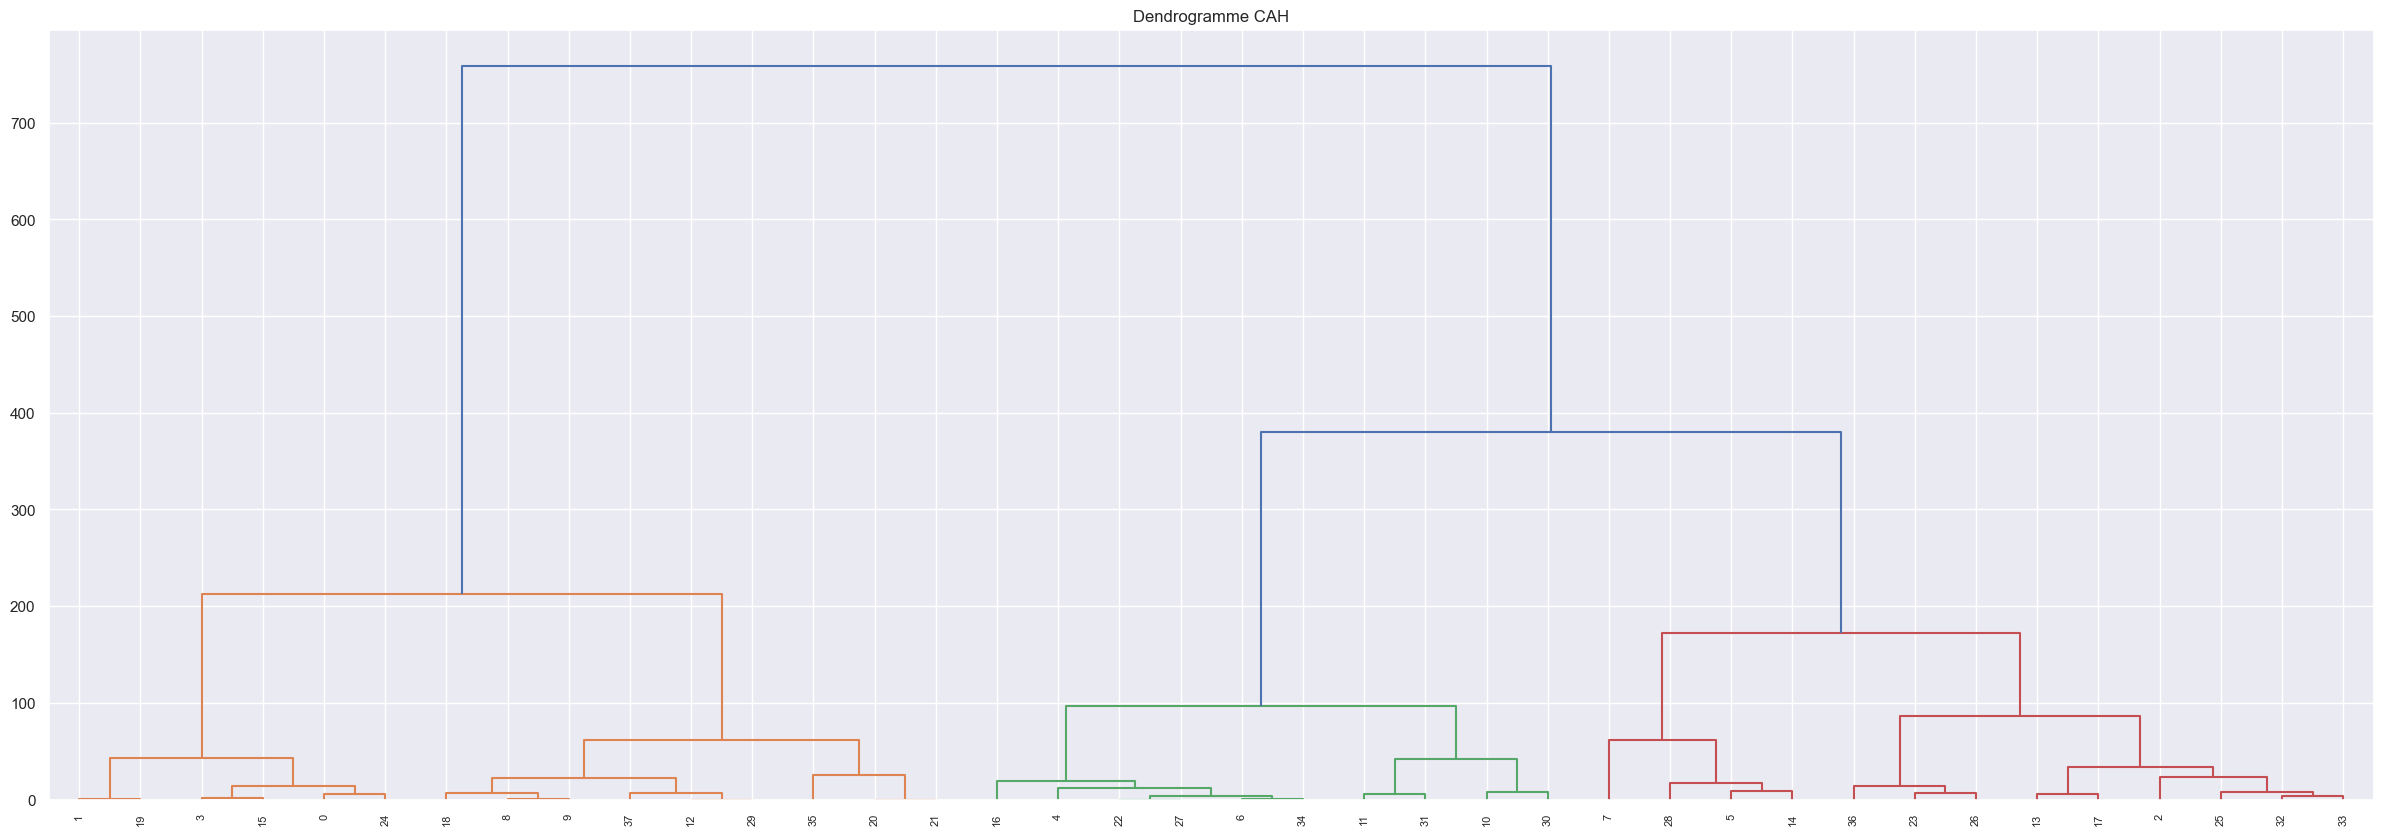

In [182]:
# Initialisaion de la figrue
plt.figure(figsize=(30,10))

# Génération de la matrice des liens
Z = linkage(table, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, leaf_rotation = 90., color_threshold = 290)
plt.show()